In [57]:
# Import Libararies
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from functions import convert_time_to_seconds

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

In [58]:
exercise_overview_path = '/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/com.samsung.health.exercise.2024110708.csv'

exercise_overview = pd.read_csv(exercise_overview_path, index_col=False)

In [59]:
single_exercise_location = exercise_overview['live_data'][0]

file_path = f"/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/jsons/com.samsung.health.exercise/{single_exercise_location}.json"

single_exercise = pd.read_json(file_path)

In [60]:
single_exercise['elapsed_seconds'] = (single_exercise['start_time'] - single_exercise['start_time'].iloc[0]).dt.total_seconds().astype(int)


In [61]:
all_exercises = []  # List to hold each exercise DataFrame

for index, row in exercise_overview.iterrows():
    try:
        # Extract the name of the file
        file_name = row['live_data']
        # Attach File name to the path
        file_path = f"/Users/daviddiaz/Desktop/Main/Heart-Rate-Monitoring-Forecast/watch_data/jsons/com.samsung.health.exercise/{file_name}.json"
        
        # Read the JSON file
        exercise_df = pd.read_json(file_path)
        
        # Create a new column to hold Minute Marker of the run
        exercise_df['elapsed_seconds'] = (exercise_df['start_time'] - exercise_df['start_time'].iloc[0]).dt.total_seconds().astype(int)

        # Create a Date Column
        exercise_df['Date'] = exercise_df['start_time'].dt.date.astype(str)

        # Append to the list
        all_exercises.append(exercise_df)
    except Exception as e:
    # Print an error message if there's an issue with reading the file
        print(f"Error reading file {file_path}: {e}")

In [62]:
concatenated_exercise_df = pd.concat(all_exercises, ignore_index=True)

In [63]:
exercises_count = len(concatenated_exercise_df['Date'].unique())

print(f"Amount of exercises: {exercises_count}")

Amount of exercises: 61


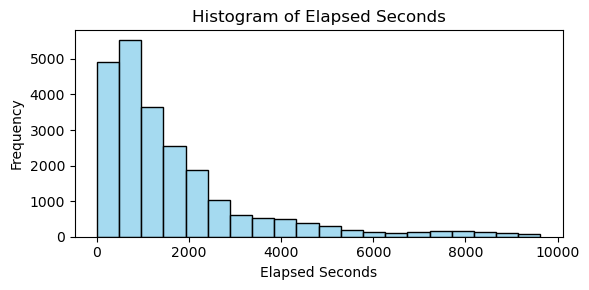

In [74]:
# Set the figure size
plt.figure(figsize=(6, 3))

# Create the histogram
sns.histplot(concatenated_exercise_df['elapsed_seconds'], kde=False, bins=20, color='skyblue')

# Add labels and title
plt.title('Histogram of Elapsed Seconds')
plt.xlabel('Elapsed Seconds')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [75]:
long_exercises = concatenated_exercise_df[concatenated_exercise_df['elapsed_seconds'] > 8000]

selected_dates = long_exercises['Date'].to_list()
selected_dates_df = concatenated_exercise_df[concatenated_exercise_df['Date'].isin(selected_dates)]

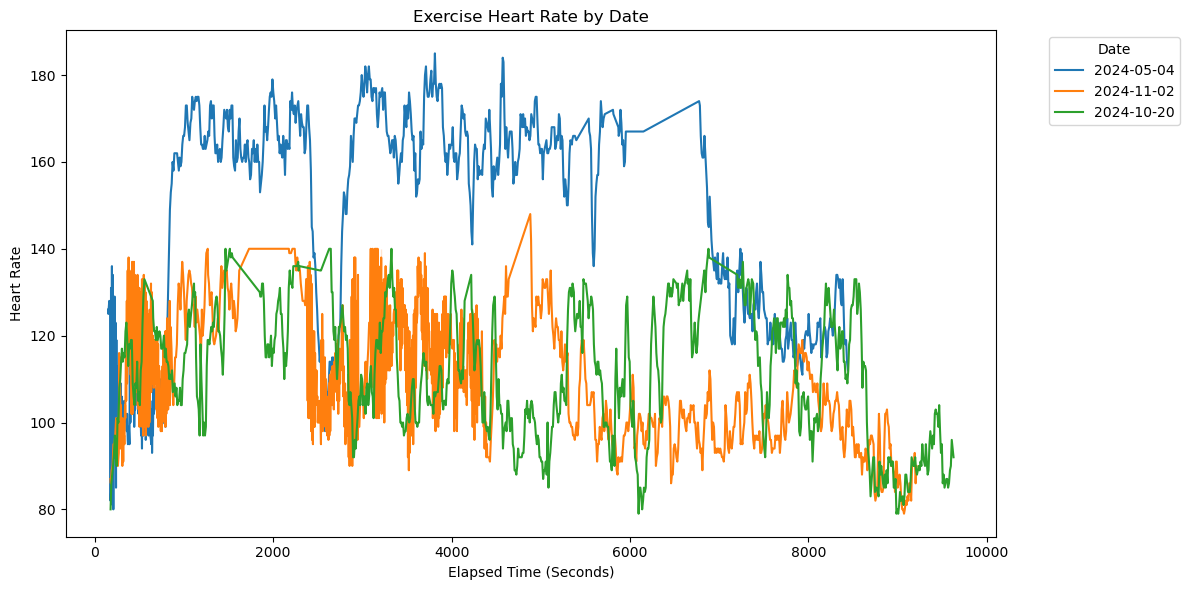

In [76]:
# Visualize Exercise by Date
y1 = selected_dates_df['heart_rate']
x1 = selected_dates_df['elapsed_seconds']
z1 = selected_dates_df['Date']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot with `Date` as hue to differentiate data points by date
sns.lineplot(x='elapsed_seconds', y='heart_rate', hue='Date', data=selected_dates_df, palette='tab10')

# Title and labels
plt.title('Exercise Heart Rate by Date')
plt.xlabel('Elapsed Time (Seconds)')
plt.ylabel('Heart Rate')

# Show the plot
plt.legend(title='Date', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend if needed
plt.tight_layout()
plt.show()

### Now the Watch continues to record data after the exercise has finished as the watch listens and the exercise mode was not started or stopped